KNN Model

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing the cleaned file that we created and saved

df = pd.read_csv('cleaned_df.csv')
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400.0,0,16,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100.0,4,23,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635.0,6,17,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141.0,1,9,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848.0,2,6,2,1,0


In [3]:
df.shape

(729287, 12)

In [4]:
# Separating the independent and dependent variables

x = df.drop(['trip_duration'] , axis = 1)
y = df['trip_duration']
x.shape , y.shape

((729287, 11), (729287,))

In [5]:
# Scaling the data to an appropriate scale

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x = pd.DataFrame(x_scaled , columns = x.columns)
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1.0,0.0,0.856226,0.353352,0.856048,0.731696,0.000000,0.695652,0.2,1.0,0.0
1,0.0,0.2,0.855612,0.350606,0.855497,0.725202,0.666667,1.000000,0.4,1.0,0.0
2,1.0,0.2,0.855451,0.350007,0.856331,0.732015,1.000000,0.739130,0.2,1.0,0.0
3,1.0,1.0,0.856087,0.352236,0.856174,0.732502,0.166667,0.391304,0.0,1.0,0.0
4,0.0,0.0,0.855098,0.349251,0.855614,0.729095,0.333333,0.260870,0.2,1.0,0.0


In [7]:
# Dividing the data into train and test data

from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x , y , random_state = 100)

In [8]:
# importing the libraries for KNN and metric evaluation

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse

In [9]:
# training our model on the train data

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(train_x , train_y)

KNeighborsRegressor(n_neighbors=10)

In [17]:
# predicting over test data

test_predict = knn.predict(test_x)
k = np.sqrt(mse(test_predict , test_y))
print('Test RMSE :' , k)

Test RMSE : 244263.76973507798


Thats a pretty good error value considering we got 10 times the same value of error when we built basic mean model.

Now lets construct an elbow classifier for picking least error parameter i.e. least value of n_neighbour

In [11]:
def Elbow(K):
    test_rmse = []
    
    for i in K:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_x , train_y)
        tmp_pred = knn.predict(test_x)
        tmp = np.sqrt(mse(tmp_pred , test_y))
        test_rmse.append(tmp)
    
    return test_rmse

In [12]:
k = range(1 , 20 , 5)

In [13]:
test = Elbow(k)

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Elbow curve')

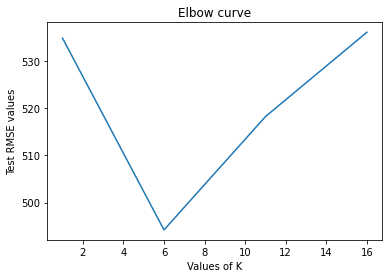

In [14]:
# plotting the elbow curve

sns.lineplot(k , test)
plt.xlabel('Values of K')
plt.ylabel('Test RMSE values')
plt.title('Elbow curve')

here we see that min value of k comes to be at 6

In [15]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(train_x , train_y)

KNeighborsRegressor(n_neighbors=6)

In [16]:
test_pred = knn.predict(test_x)
k = np.sqrt(mse(test_pred , test_y))
print('RMSE error :' , k)

RMSE error : 494.2304824017616


Yes we can see the drop in error from the first one.